In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/food_truck_data.txt')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
def cost_function(X,y,theta):
  m = len(y)
  y_pred = X.dot(theta)
  error = (y_pred-y)**2
  return (1/(2*m))*np.sum(error)

In [ ]:
m = data['Population'].size
X = np.append(np.ones((m,1)),data['Population'].values.reshape(m,1),axis = 1)
y = data['Profit'].values.reshape(m,1)
theta = np.zeros((2,1))

cost_function(X,y,theta)

32.072733877455676

In [ ]:
def gradient_descent(X,y,theta,alpha,iterations):
  m = len(y)
  cost = []
  for i in range(iterations):
    y_pred = X.dot(theta)
    error = np.dot(X.transpose(),(y_pred-y))
    theta -= alpha*(1/m)*error
    cost.append(cost_function(X,y,theta))
  return theta,cost

In [ ]:
theta,cost = gradient_descent(X,y,theta,0.01,10)
print("h(x)= {}+{}x1".format(str(round(theta[0,0],2)),str(round(theta[1,0],2))))

h(x)= 0.01+0.8x1


<Axes: xlabel='Population', ylabel='Profit'>

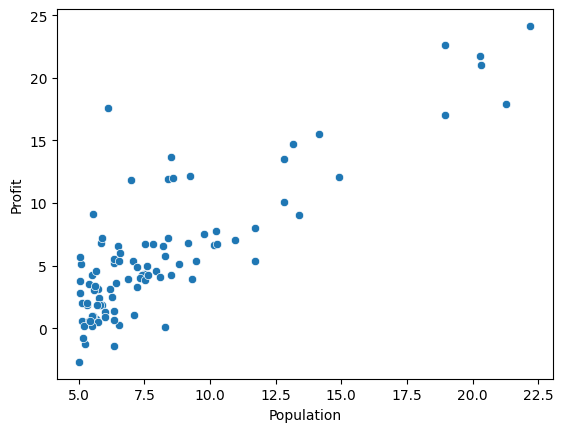

In [ ]:
sns.scatterplot(x=data['Population'], y=data['Profit'])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)
cost_values = np.zeros((len(theta_0),len(theta_1)))
for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i],theta_1[j]])
    cost_values[i,j]=cost_function(X,y,t)

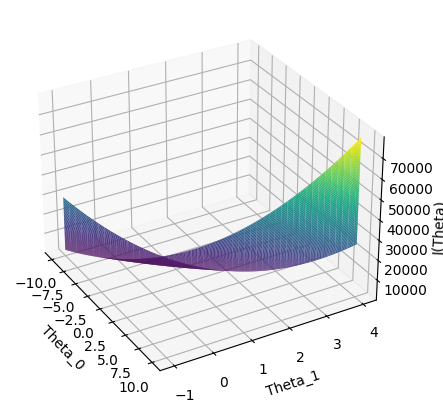

In [ ]:
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(111,projection = '3d')
surf = ax.plot_surface(theta_0,theta_1,cost_values,cmap = 'viridis')
plt.xlabel("Theta_0")
plt.ylabel("Theta_1")
ax.set_zlabel("J(Theta)")
ax.view_init(30,330)
plt.show()

Text(0, 0.5, '$J(\\Theta)$')

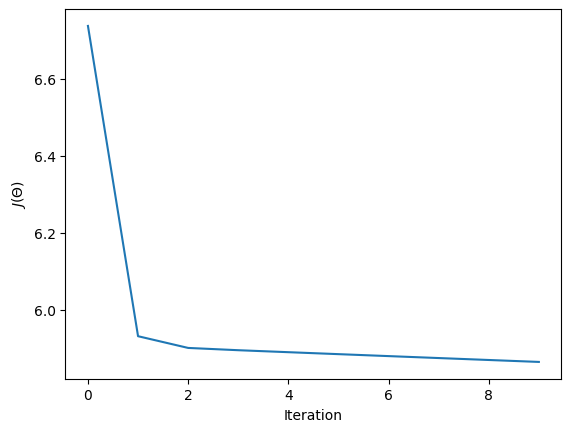

In [ ]:
plt.plot(cost)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")

In [ ]:
theta

array([[0.0086469],
       [0.8007915]])

In [ ]:
def predict(X,theta):
  y_pred= np.dot(theta.transpose(),x)
  return y_pred

Dataset 3

In [ ]:
df = pd.read_csv('/content/home_data (1).csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650.0
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639.0
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062.0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000.0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503.0


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       1
dtype: int64

Selecting only certain necessary columns from the dataset so as to reduce noise

In [ ]:
col_to_be_used = ['bedrooms','bathrooms','sqft_living']
df1 = df[col_to_be_used]
df1.head()

,bedrooms,bathrooms,sqft_living
0,3,1.00,1180
1,3,2.25,2570
2,2,1.00,770
3,4,3.00,1960
4,3,2.00,1680


Splitting the dataset into training and test values randomly

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df1,df['price'],test_size=0.3,random_state=50)

Applying Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_test,y_test)

0.513745037663095

In [ ]:
reg.score(X_test,y_test)

0.513745037663095

# Regularization

Lasso

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 50,max_iter = 100,tol = 0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(X_test,y_test)

0.5137330831372033

In [ ]:
lasso_reg.score(X_train,y_train)

0.5002042710189334

Ridge

In [ ]:
ridge_reg = linear_model.Ridge(alpha = 50,max_iter = 100,tol = 0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(X_test,y_test)

0.5137221516148787

In [ ]:
ridge_reg.score(X_train,y_train)

0.500203831866743

Plotting a scatterplot with the line which is best fitted for the given data

In [ ]:
def plot_regression_line(X, y, theta):
  sns.scatterplot(x = X, y = y)
  y_pred = theta[0] + theta[1]*X
  sns.lineplot(x = X, y=y_pred, color = "g")
  plt.xlabel('x')
  plt.ylabel('y')

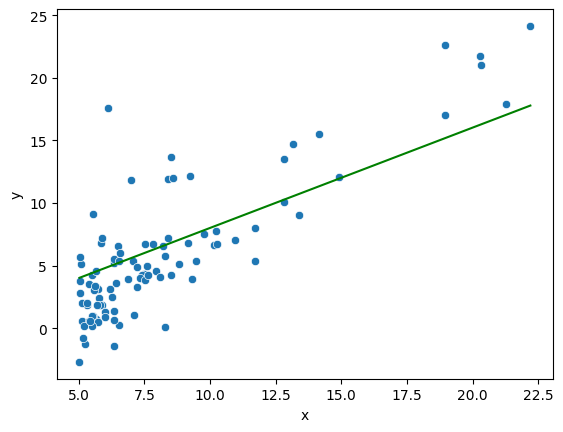

In [ ]:
plot_regression_line(data['Population'], data['Profit'],theta)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X = data['Population'].values.reshape(-1,1)

Computing the mean squared error, so as to understand if the regressor is feasible or not

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, data['Profit'], test_size=0.3, random_state=7)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7.1339274016837795


# Simulating a sine curve

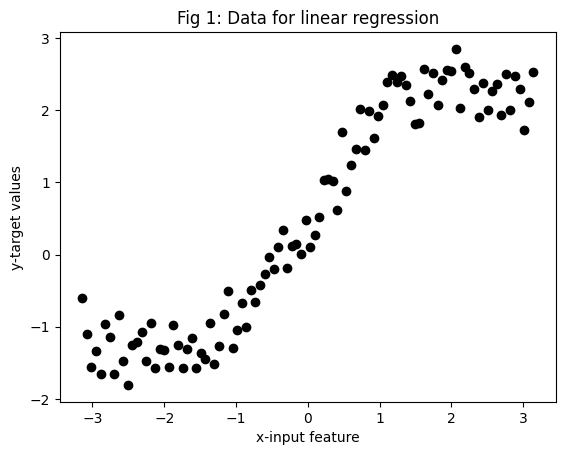

In [ ]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='black')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1: Data for linear regression')
plt.show()